In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
def set_binary(row):
    if row == 0:
        return 0
    else :
        return 1
raw_features=pd.read_csv('features3.csv')
# X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
#                                                    y_fruits.as_matrix(),
#                                                    random_state = 0)

raw_features=raw_features.drop('Unnamed: 0',axis=1)
#y=raw_features['label'].values

# clf = RandomForestClassifier(n_estimators=400,max_depth=12,n_jobs=-1).fit(X_train, y_train)

# print('Random Forest, Fruit dataset, default settings')
# print('Accuracy of RF classifier on training set: {:.2f}'
#      .format(clf.score(X_train, y_train)))
# print('Accuracy of RF classifier on test set: {:.2f}'
#      .format(clf.score(X_test, y_test)))

In [2]:
y=raw_features['label'].apply(set_binary)
raw_features=raw_features.drop('label',axis=1)
X=raw_features.as_matrix()

In [3]:
X

array([[ 1.        ,  0.46226415,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 4.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        ,  0.24561404,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [5]:
clf = RandomForestClassifier(n_estimators=600,max_depth=15,n_jobs=-1).fit(X_train, y_train)

In [6]:
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of RF classifier on training set: 0.80


In [7]:
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of RF classifier on test set: 0.70


In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent

y_majority_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

In [9]:
confusion

array([[15214,  7062],
       [ 6380, 15932]])

In [10]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_majority_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.78


In [11]:
from sklearn.metrics import recall_score
recall_sco=recall_score(y_test,y_majority_predicted)
recall_sco

0.7140552169236285

In [12]:
from sklearn.metrics import precision_score
recall_sco=precision_score(y_test,y_majority_predicted)
recall_sco

0.69287640253979299

<IPython.core.display.Javascript object>


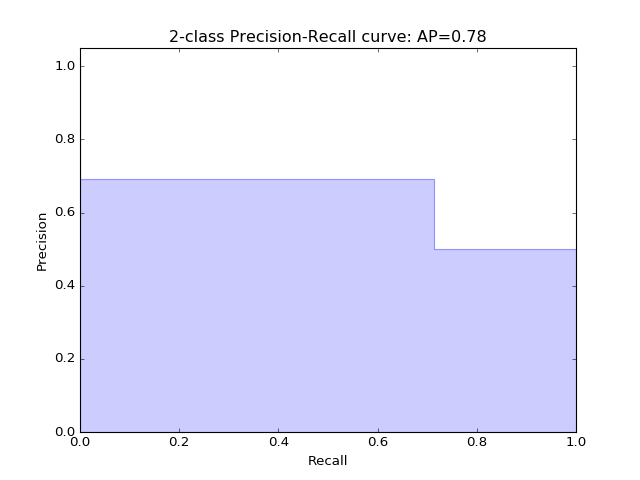

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_majority_predicted)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [14]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.55
Accuracy of GaussianNB classifier on test set: 0.55


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier().fit(X_train, y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

Accuracy of GBDT classifier on training set: 0.70
Accuracy of GBDT classifier on test set: 0.70


In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nn = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nn.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nn.score(X_test_scaled, y_test)))

NameError: name 'X_train' is not defined